<a href="https://colab.research.google.com/github/ibellenote/DSC465/blob/main/Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
sklearn.__version__

'1.2.2'

In [ ]:
%config InlineBackend.figure_format ='retina'
RANDOM_STATE = 42

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
#df.isna().sum()

In [ ]:
X = df.drop(['CLIENTNUM','Attrition_Flag'], axis=1)
X.head()
X.info()
X.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   Customer_Age                                                                                                                        10127 non-null  int64  
 1   Gender                                                                                                                              10127 non-null  object 
 2   Dependent_count                                                                                                                     10127 non-null  int64  
 3   Education_Level                                                                  

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [ ]:
print(X.Gender.value_counts())
print(X.Education_Level.value_counts())
print(X.Marital_Status.value_counts())
print(X.Income_Category.value_counts())
print(X.Card_Category.value_counts())

0    5358
1    4769
Name: Gender, dtype: int64
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


### Categorical Option 1

In [ ]:
cat_types = ['bool','object','category']
X = X.copy()
X[X.select_dtypes(cat_types).columns] = X.select_dtypes(cat_types).apply(lambda x: x.astype('category'))

#     # Another method to convert bool and object to category 
# # Create a series called dtypes that has the dtype of every column in data_clean 
# dtypes = data_clean.dtypes
# # Convert object dtypes to category dtypes 
# cat_dtypes = data_clean.dtypes[dtypes == 'object'].index.tolist()
# data_clean[cat_dtypes] = data_clean[cat_dtypes].apply(lambda x: x.astype('category'))

#%% Initial glance at cleaned data
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype   
---  ------                                                                                                                              --------------  -----   
 0   Customer_Age                                                                                                                        10127 non-null  int64   
 1   Gender                                                                                                                              10127 non-null  category
 2   Dependent_count                                                                                                                     10127 non-null  int64   
 3   Education_Level                                                             

In [ ]:
for col in X.select_dtypes('category').columns.to_list():
    print(col + ': '+ str(X[col].cat.categories.to_list()))

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

features_to_encode = X.select_dtypes('category').columns.to_list()
for feature in features_to_encode:
    X = encode_and_bind(X, feature)
    
X.info()

Gender: ['F', 'M']
Education_Level: ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown']
Marital_Status: ['Divorced', 'Married', 'Single', 'Unknown']
Income_Category: ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown']
Card_Category: ['Blue', 'Gold', 'Platinum', 'Silver']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 39 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   Customer_Age                                                                                                                        10127 non-null  int64  
 1   Dependent_count                                       

### Categorical Option 2

In [ ]:
X["Gender"] = X["Gender"].map({'F':0, 'M':1})
X.Gender.value_counts()

0    5358
1    4769
Name: Gender, dtype: int64

In [ ]:
X["Education_Level"] = X["Education_Level"].map({'Graduate':0, 'High School':1, 'Unknown':2, 'Uneducated':3, 'College':4, 'Post-Graduate':5, 'Doctorate':6})
X.Education_Level.value_counts()

0    3128
1    2013
2    1519
3    1487
4    1013
5     516
6     451
Name: Education_Level, dtype: int64

In [ ]:
X["Marital_Status"] = X["Marital_Status"].map({'Married':0, 'Single':1, 'Unknown':2, 'Divorced':3})
X.Marital_Status.value_counts()

0    4687
1    3943
2     749
3     748
Name: Marital_Status, dtype: int64

In [ ]:
X["Income_Category"] = X["Income_Category"].map({'Less than $40K':0, '$40K - $60K':1, '$80K - $120K':2, '$60K - $80K':3, 'Unknown':4, '$120K +':5})
X.Income_Category.value_counts()

0    3561
1    1790
2    1535
3    1402
4    1112
5     727
Name: Income_Category, dtype: int64

In [ ]:
X["Card_Category"] = X["Card_Category"].map({'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3})
X.Card_Category.value_counts()

0    9436
1     555
2     116
3      20
Name: Card_Category, dtype: int64

In [ ]:
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,45,1,3,1,0,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,49,0,5,0,1,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,51,1,3,0,0,2,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,40,0,4,1,2,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,40,1,3,3,0,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
X.info()
X.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   Customer_Age                                                                                                                        10127 non-null  int64  
 1   Gender                                                                                                                              10127 non-null  int64  
 2   Dependent_count                                                                                                                     10127 non-null  int64  
 3   Education_Level                                                                  

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,0.470919,2.346203,1.861361,0.758862,1.693394,0.083638,35.928409,3.812580,2.341167,...,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,8.016814,0.499178,1.298908,1.770156,0.879864,1.647213,0.333784,7.986416,1.554408,1.010622,...,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,...,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,41.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.000000,3.000000,2.000000,...,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,46.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,36.000000,4.000000,2.000000,...,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,52.000000,1.000000,3.000000,3.000000,1.000000,3.000000,0.000000,40.000000,5.000000,3.000000,...,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,3.000000,56.000000,6.000000,6.000000,...,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


<Axes: >

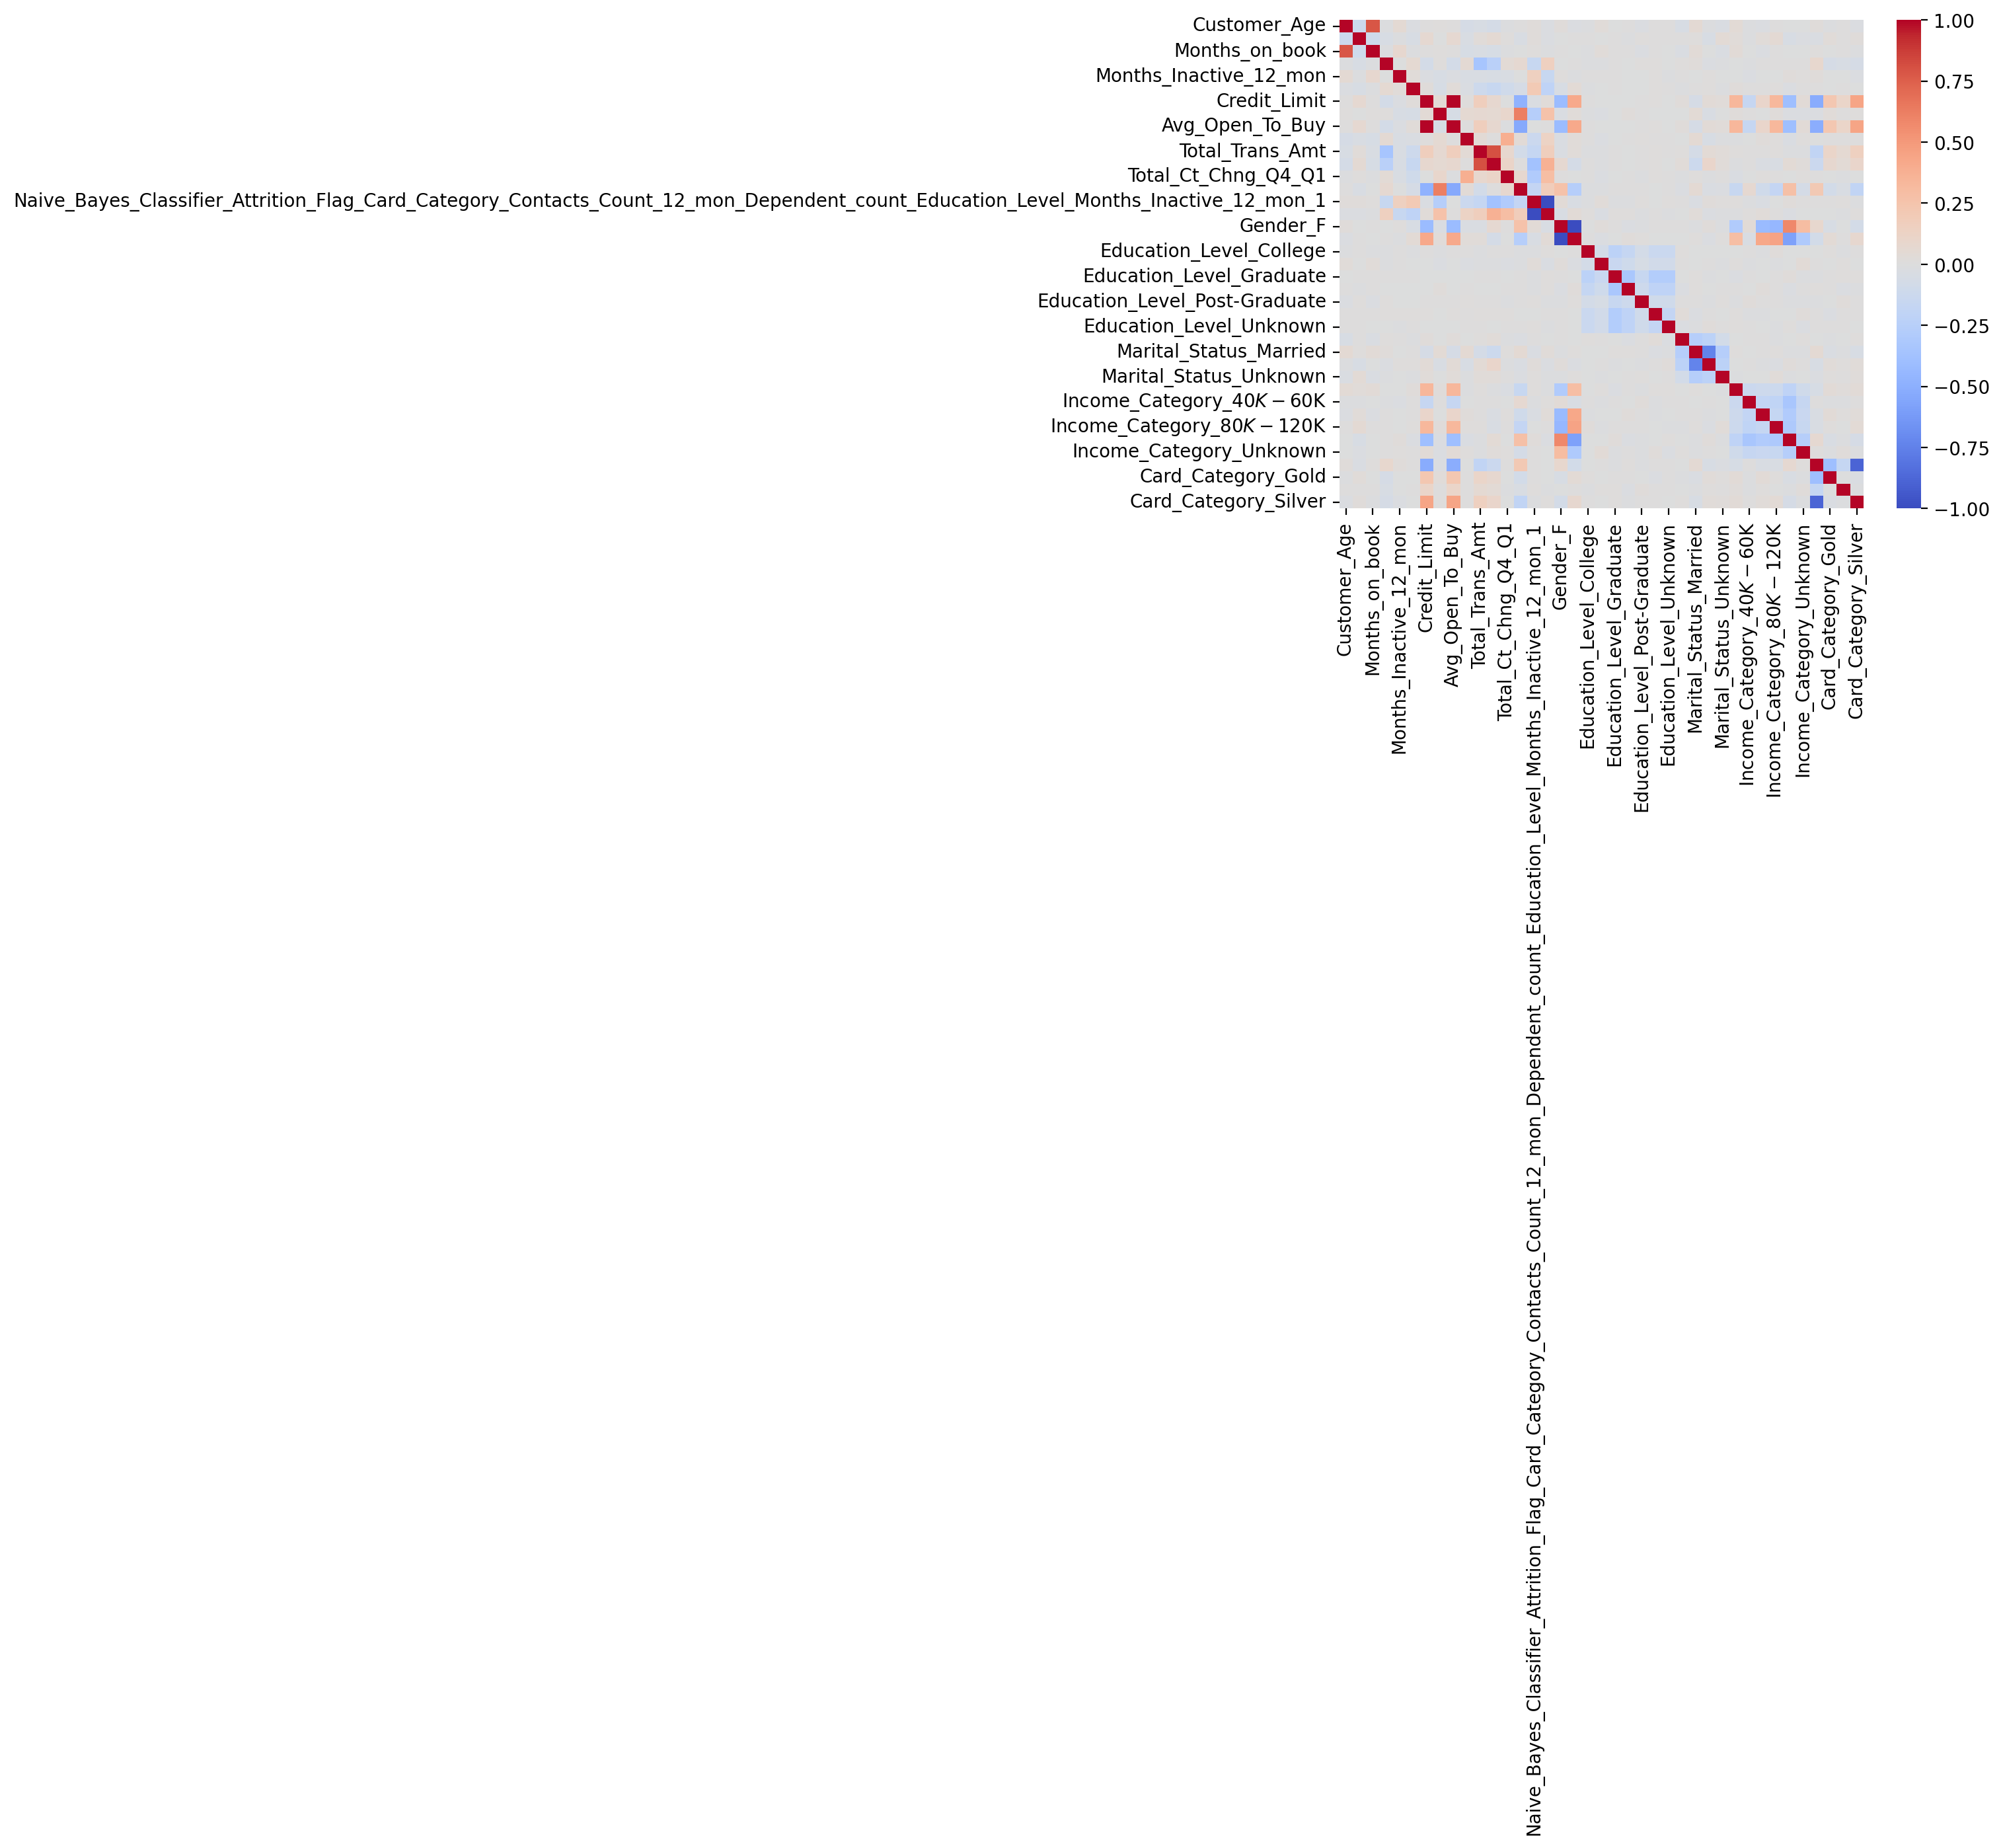

In [ ]:
X.corr()
#plt.figure(figsize=(14,14))
sns.heatmap(X.corr(), cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
y = df.Attrition_Flag
y.head()
y.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [ ]:
y = lb.fit_transform(y).ravel()

In [ ]:
y = pd.Series(y)
y.value_counts()

1    8500
0    1627
dtype: int64

### SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y) 

In [ ]:
y_train.value_counts(normalize=True)

1    0.838446
0    0.161554
dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

1    0.842022
0    0.157978
dtype: float64

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [ ]:
print(svc.score(X_train,y_train))
print(svc.score(X_test,y_test))

0.8384463462804477
0.8420221169036335


In [ ]:
pred = svc.predict(X_test)
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       400
           1       0.84      1.00      0.91      2132

    accuracy                           0.84      2532
   macro avg       0.42      0.50      0.46      2532
weighted avg       0.71      0.84      0.77      2532



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 55, test_size= 0.25)

In [ ]:
y_train.value_counts(normalize=True)

1    0.839368
0    0.160632
dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

1    0.839258
0    0.160742
dtype: float64

### the logistic regression classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(max_iter = 10000, C=0.1)
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=10000)

In [ ]:
pred = clf.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = pred)

1.0

In [ ]:
pd.DataFrame(metrics.confusion_matrix(y_true=y_train, y_pred=pred, labels=[0, 1]))

,0,1
0,1220,0
1,0,6375


In [ ]:
print(metrics.classification_report(y_true=y_train, y_pred=pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1220
           1       1.00      1.00      1.00      6375

    accuracy                           1.00      7595
   macro avg       1.00      1.00      1.00      7595
weighted avg       1.00      1.00      1.00      7595



### the k-nearest neighbours classifier 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = clf1.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = pred)

1.0

In [ ]:
pred = clf1.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = pred)

0.8732227488151659

In [ ]:
pd.DataFrame(metrics.confusion_matrix(y_true=y_test, y_pred=pred, labels=[0, 1]))

,0,1
0,237,170
1,151,1974


In [ ]:
print(metrics.classification_report(y_true=y_test, y_pred=pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.61      0.58      0.60       407
           1       0.92      0.93      0.92      2125

    accuracy                           0.87      2532
   macro avg       0.77      0.76      0.76      2532
weighted avg       0.87      0.87      0.87      2532



In [ ]:
from sklearn import preprocessing

In [ ]:
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [ ]:
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49, 99]
accuracy_train = []
accuracy_test = []
for K in K_list:
    clf1 = KNeighborsClassifier(n_neighbors=K)
    clf1.fit(X_train, y_train)
    pred_trn = clf1.predict(X_train)
    accuracy_train.append(metrics.accuracy_score(y_true = y_train, y_pred = pred_trn))
    pred_tst = clf1.predict(X_test)
    accuracy_test.append(metrics.accuracy_score(y_true = y_test, y_pred = pred_tst))

In [ ]:
accuracy_train

[1.0,
 0.9354838709677419,
 0.9192890059249507,
 0.9104674127715603,
 0.9104674127715603,
 0.9028308097432521,
 0.8980908492429229,
 0.8961158657011191,
 0.8922975641869652,
 0.8901909150757077,
 0.889137590520079,
 0.8884792626728111,
 0.8871626069782752,
 0.8757077024358131]

In [ ]:
accuracy_test

[0.8732227488151659,
 0.8886255924170616,
 0.891390205371248,
 0.8921800947867299,
 0.8925750394944708,
 0.8933649289099526,
 0.8886255924170616,
 0.8882306477093207,
 0.8909952606635071,
 0.8878357030015798,
 0.8862559241706162,
 0.8874407582938388,
 0.8838862559241706,
 0.8763823064770933]

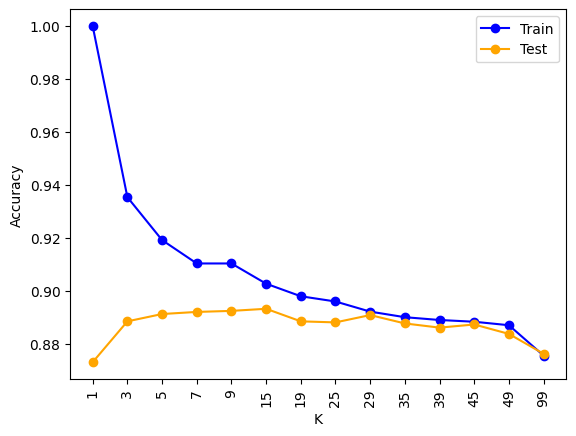

In [ ]:
f, ax = plt.subplots()
ax.plot(list(range(len(K_list))), accuracy_train, color='blue', marker='o', label='Train')
ax.plot(list(range(len(K_list))), accuracy_test, color='orange', marker='o', label='Test')
ax.set_xlabel('K')
ax.set_ylabel('Accuracy')
ax.set_xticks(list(range(len(K_list))))
ax.set_xticklabels([str(K) for K in K_list], rotation=90)
ax.legend();

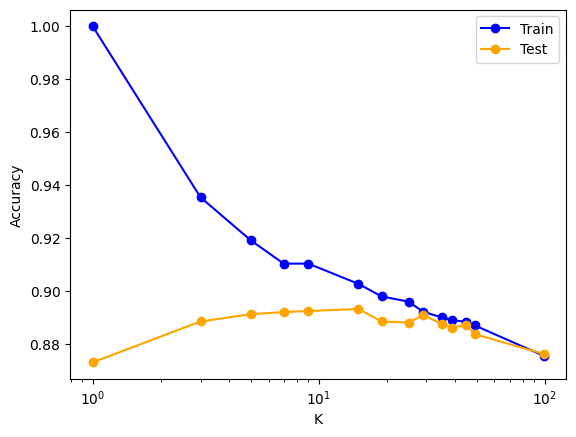

In [ ]:
f, ax = plt.subplots()
ax.plot(K_list, accuracy_train, color='blue', marker='o', label='Train')
ax.plot(K_list, accuracy_test, color='orange', marker='o', label='Test')
ax.set_xlabel('K')
ax.set_ylabel('Accuracy')
ax.set_xscale('log', base=10)
ax.legend();

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=RANDOM_STATE)

In [ ]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
def fun_print_scores(fitted_estimator, X, y_true):
    
    y_pred = fitted_estimator.predict(X)
    print("Accuracy.....: {:.3f}".format(metrics.accuracy_score(y_true, y_pred)))
    print("Bal. Accuracy: {:.3f}".format(metrics.balanced_accuracy_score(y_true, y_pred)))
    print("F-1 Score....: {:.3f}".format(metrics.f1_score(y_true, y_pred, average="binary")))
    print("Recall.......: {:.3f}".format(metrics.recall_score(y_true, y_pred, pos_label=1)))
    print("Precision....: {:.3f}".format(metrics.precision_score(y_true, y_pred, pos_label=1)))
    print("Specificity..: {:.3f}".format(metrics.recall_score(y_true, y_pred, pos_label=0)))
    
    metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='all')

In [ ]:
def plot_feature_importances(model, dff):
    n_features = dff.shape[1]
    df_colnames= dff.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
    plt.ylim(-1, n_features)

Accuracy.....: 1.000
Bal. Accuracy: 1.000
F-1 Score....: 1.000
Recall.......: 1.000
Precision....: 1.000
Specificity..: 1.000


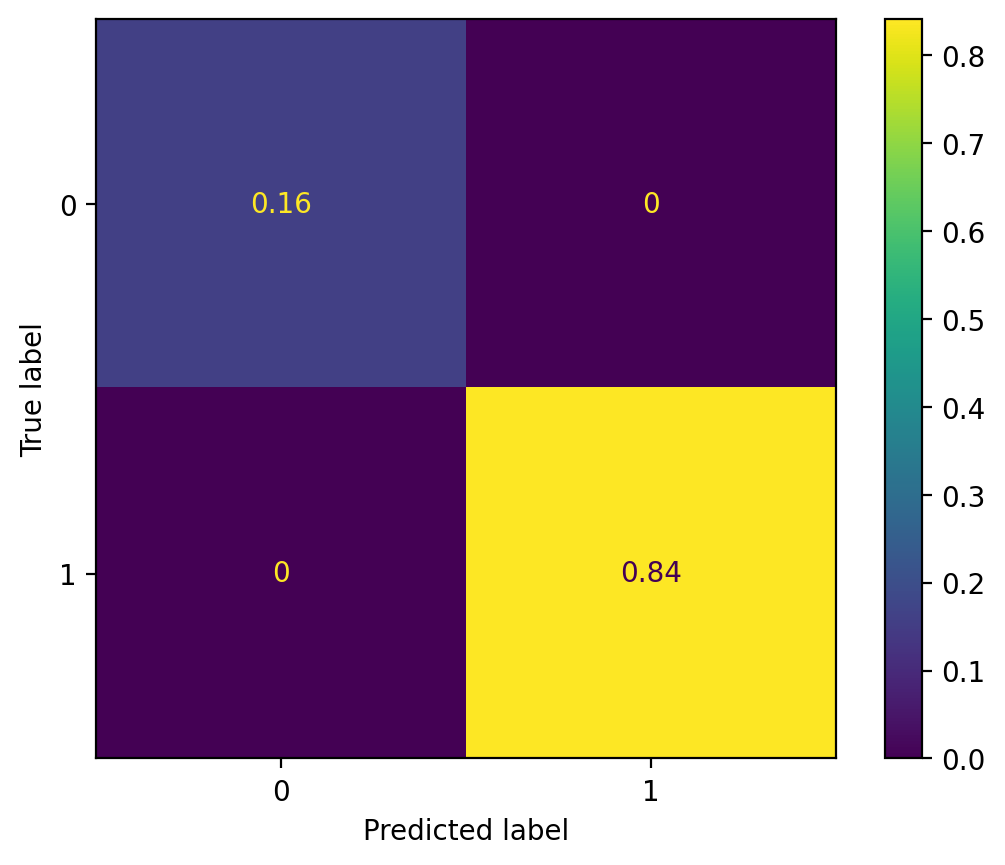

In [ ]:
fun_print_scores(rf, X_train, y_train)

Accuracy.....: 1.000
Bal. Accuracy: 1.000
F-1 Score....: 1.000
Recall.......: 1.000
Precision....: 1.000
Specificity..: 1.000


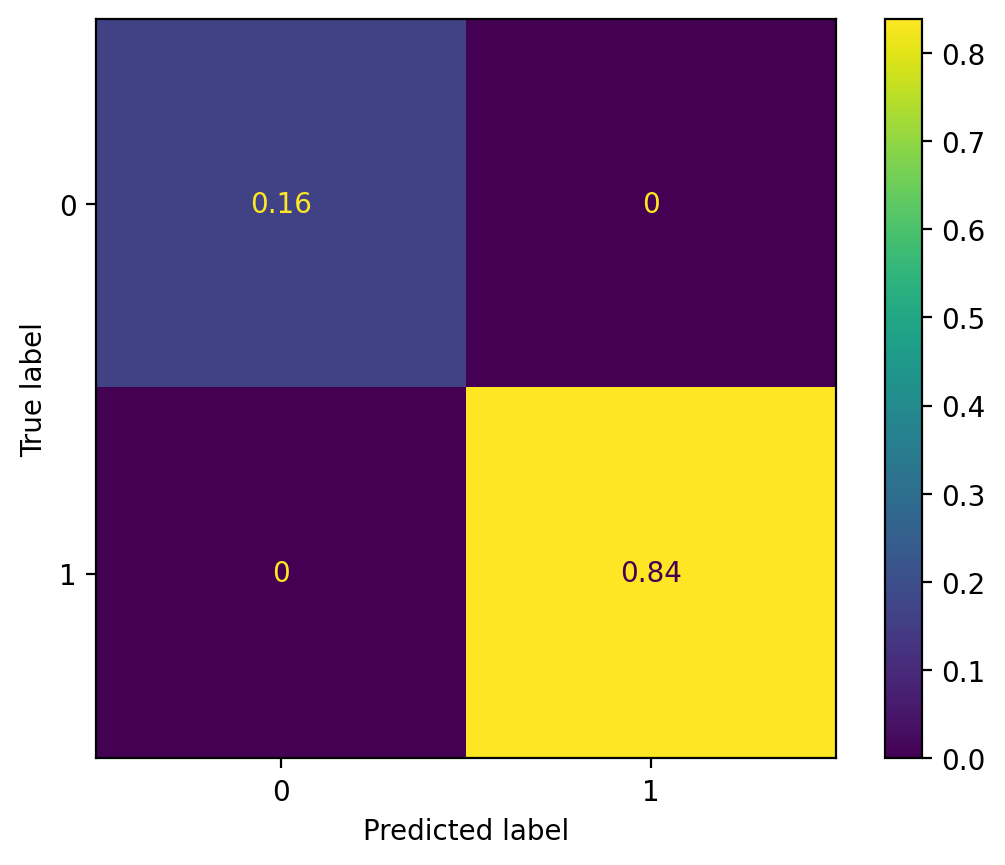

In [ ]:
fun_print_scores(rf, X_val, y_val)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection

In [ ]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)
params = {}
min_samples_splits = [10, 50, 100, 200]
max_depths = [2,5,10,15]
n_estimators = [100, 500]
params = {
    "min_samples_split": min_samples_splits,
    "max_depth": max_depths, 
    "n_estimators": n_estimators
         }

In [ ]:
grid = model_selection.GridSearchCV(estimator=rf, param_grid=params, scoring="f1", n_jobs=-1)
grid

GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15],
                         'min_samples_split': [10, 50, 100, 200],
                         'n_estimators': [100, 500]},
             scoring='f1')

In [ ]:
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 2, 'min_samples_split': 10, 'n_estimators': 500}

Accuracy.....: 1.000
Bal. Accuracy: 1.000
F-1 Score....: 1.000
Recall.......: 1.000
Precision....: 1.000
Specificity..: 1.000


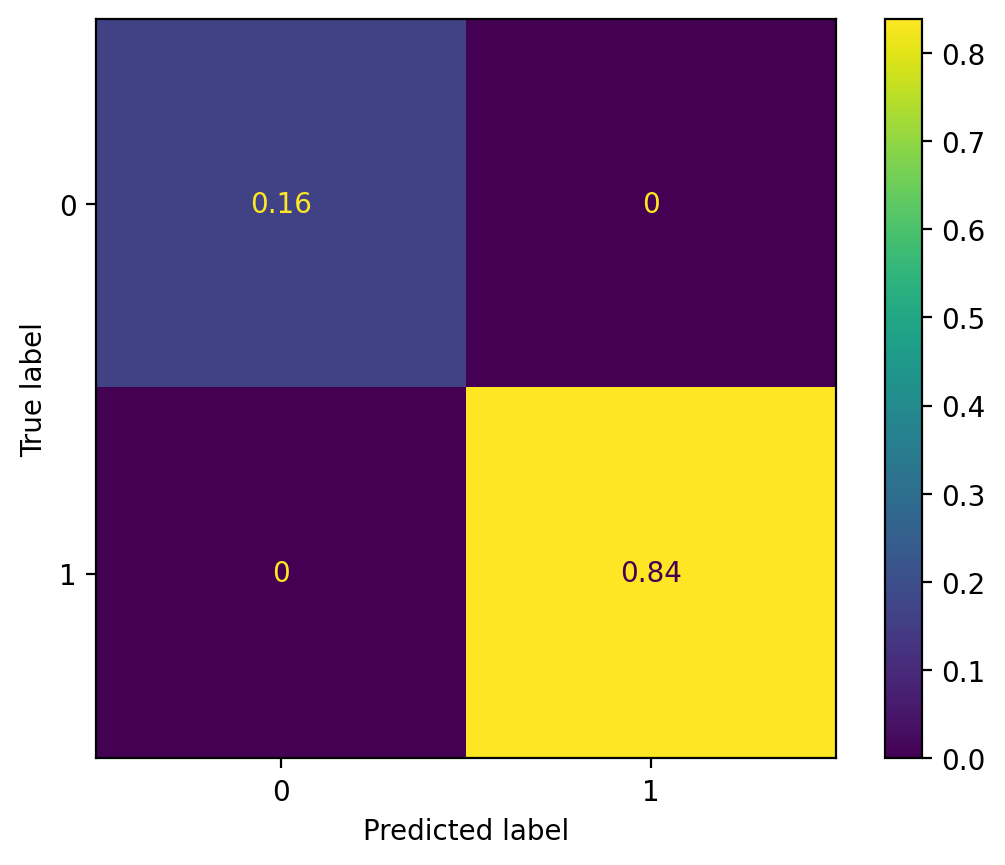

In [ ]:
fun_print_scores(grid.best_estimator_, X_val, y_val)

### Adaboost classifier